In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
X, y = make_moons(100, noise=.25, random_state=2)

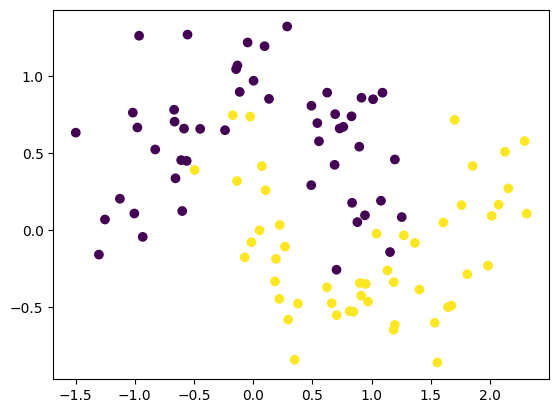

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [8]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [9]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=2000, validation_split=0.2, verbose=2)

Epoch 1/2000
3/3 - 4s - loss: 0.6096 - accuracy: 0.6125 - val_loss: 0.3611 - val_accuracy: 0.9000 - 4s/epoch - 1s/step
Epoch 2/2000
3/3 - 0s - loss: 0.4291 - accuracy: 0.8250 - val_loss: 0.2084 - val_accuracy: 0.9000 - 130ms/epoch - 43ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.3887 - accuracy: 0.8500 - val_loss: 0.1995 - val_accuracy: 0.9000 - 138ms/epoch - 46ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.3828 - accuracy: 0.8500 - val_loss: 0.2581 - val_accuracy: 0.9000 - 162ms/epoch - 54ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.3666 - accuracy: 0.8375 - val_loss: 0.2383 - val_accuracy: 0.9000 - 164ms/epoch - 55ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.3414 - accuracy: 0.8500 - val_loss: 0.2248 - val_accuracy: 0.9000 - 170ms/epoch - 57ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.3348 - accuracy: 0.8500 - val_loss: 0.1944 - val_accuracy: 0.9000 - 117ms/epoch - 39ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.3300 - accuracy: 0.8500 - val_loss: 0.2143 - val_accuracy: 0.9000 - 136ms/epoch - 45ms/step
Epoch 9/2000


9600/9600 [==============================] - 34s 4ms/step


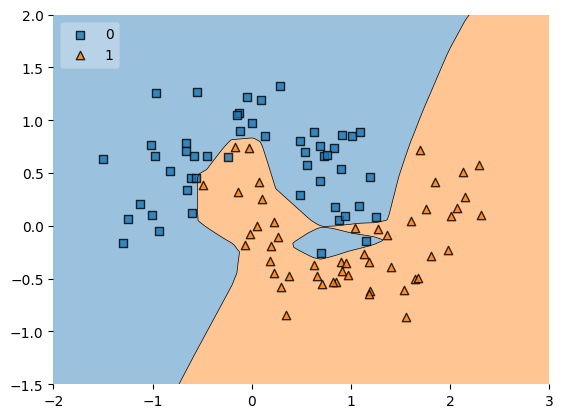

In [10]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

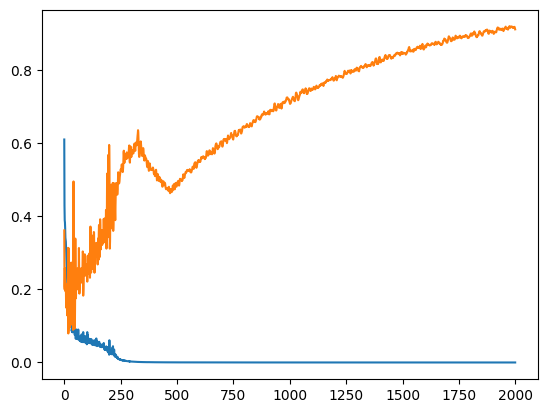

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [12]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model.add(Dense(128, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))

model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [14]:
adam = Adam(learning_rate=0.01)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(X, y, epochs=2000, validation_split=0.2, verbose=2)

Epoch 1/2000
3/3 - 1s - loss: 4.0794 - accuracy: 0.5625 - val_loss: 2.7128 - val_accuracy: 0.9000 - 1s/epoch - 385ms/step
Epoch 2/2000
3/3 - 0s - loss: 2.3599 - accuracy: 0.8125 - val_loss: 1.5282 - val_accuracy: 0.9000 - 79ms/epoch - 26ms/step
Epoch 3/2000
3/3 - 0s - loss: 1.3525 - accuracy: 0.8125 - val_loss: 0.8832 - val_accuracy: 0.9000 - 87ms/epoch - 29ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.8572 - accuracy: 0.8500 - val_loss: 0.5816 - val_accuracy: 0.9000 - 89ms/epoch - 30ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.6678 - accuracy: 0.8250 - val_loss: 0.5110 - val_accuracy: 0.9000 - 83ms/epoch - 28ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.6343 - accuracy: 0.8375 - val_loss: 0.5477 - val_accuracy: 0.9000 - 85ms/epoch - 28ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.6563 - accuracy: 0.8250 - val_loss: 0.5496 - val_accuracy: 0.9000 - 82ms/epoch - 27ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.7104 - accuracy: 0.7875 - val_loss: 0.4987 - val_accuracy: 0.9000 - 102ms/epoch - 34ms/step
Epoch 9/2000
3/3

9600/9600 [==============================] - 13s 1ms/step


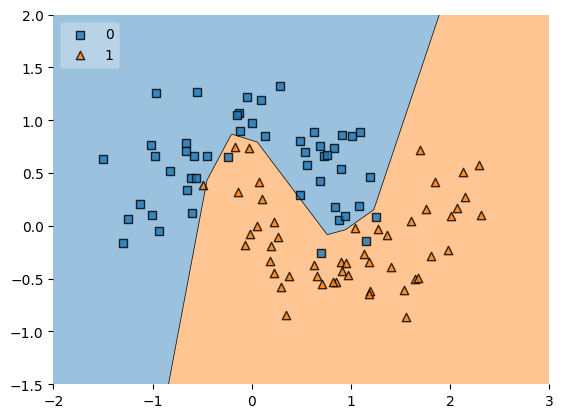

In [15]:
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

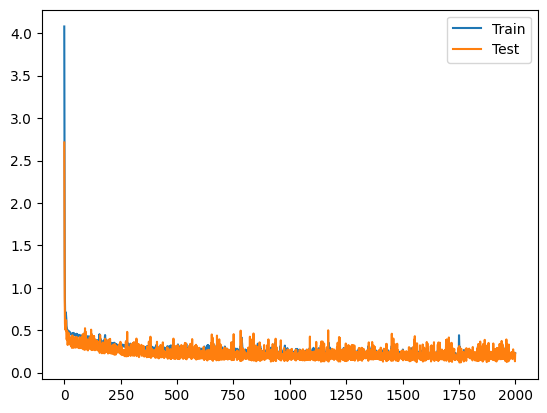

In [16]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

In [17]:
#here we observe that overfitting is reduced